In [37]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datasets import Dataset, DatasetDict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style and fonts
sns.set_style('whitegrid')
# Increase font sizes for readability
sns.set_context('notebook', font_scale=1.4)
plt.rcParams.update({
    'figure.figsize': (18, 8),
    'font.size': 32,
    'axes.titlesize': 28,
    'axes.labelsize': 25,
    'xtick.labelsize': 23,
    'ytick.labelsize': 23,
    'legend.fontsize': 21
})

In [2]:
base_dir = Path("../outputs/tta")
datasets = ['subset', 'ft_vae', 'musiccaps', 'lp-musiccaps', 'zero-shot', 'base_vae']

In [3]:
predictions = {}

for d in datasets:
    print(d)
    model_dir = base_dir / d / "per_sample_scores.csv"
    model_predictions = pd.read_csv(model_dir)
    predictions[d] = pd.DataFrame(model_predictions).head(500)
display(predictions['ft_vae'].head())

subset
ft_vae
musiccaps
lp-musiccaps
zero-shot
base_vae


,id,aspect_list,prediction,perplexity,llm_judge_score,llm_judge_reasoning,prediction_length,filename,clap_score
0,77bedd0ea9baf7f99eeb628b155da91a,"['dark', 'electronic', 'female voice', 'harsh'...",This electronic instrumental is played by a DJ...,8.507812,9.0,The description excels,360,77bedd0ea9baf7f99eeb628b155da91a.wav,0.215688
1,d2e35e60e085c8e37f9862b0fe33401b,"['bass', 'emotional', 'fast tempo', 'no voices...",The Pop song features wide electric guitar mel...,17.593750,5.0,The description attempts to incorporate most o...,287,d2e35e60e085c8e37f9862b0fe33401b.wav,0.357318
2,f86e1bdd85ef51b089a2dc51fab13f89,"['digital drums', 'emotional', 'medium to upte...",A female voice is singing in a higher pitch wh...,20.687500,8.0,The revised description more accurately reflec...,233,f86e1bdd85ef51b089a2dc51fab13f89.wav,0.009215
3,dbcc4c855f3cfa24536b29bcef93e839,"['groovy bass', 'jazz', 'male singer', 'passio...",A male vocalist sings this cool jazz. The temp...,11.757812,8.0,The description accurately incorporates the gi...,320,dbcc4c855f3cfa24536b29bcef93e839.wav,0.183224
4,3c773b0b8d4a2bb2ec6520fae68b5cca,"['electric guitar', 'energetic', 'groovy', 'gu...",This is an instrumental hip-hop/beatstep piece...,10.585938,7.0,The description is somewhat accurate and coher...,415,3c773b0b8d4a2bb2ec6520fae68b5cca.wav,0.850758


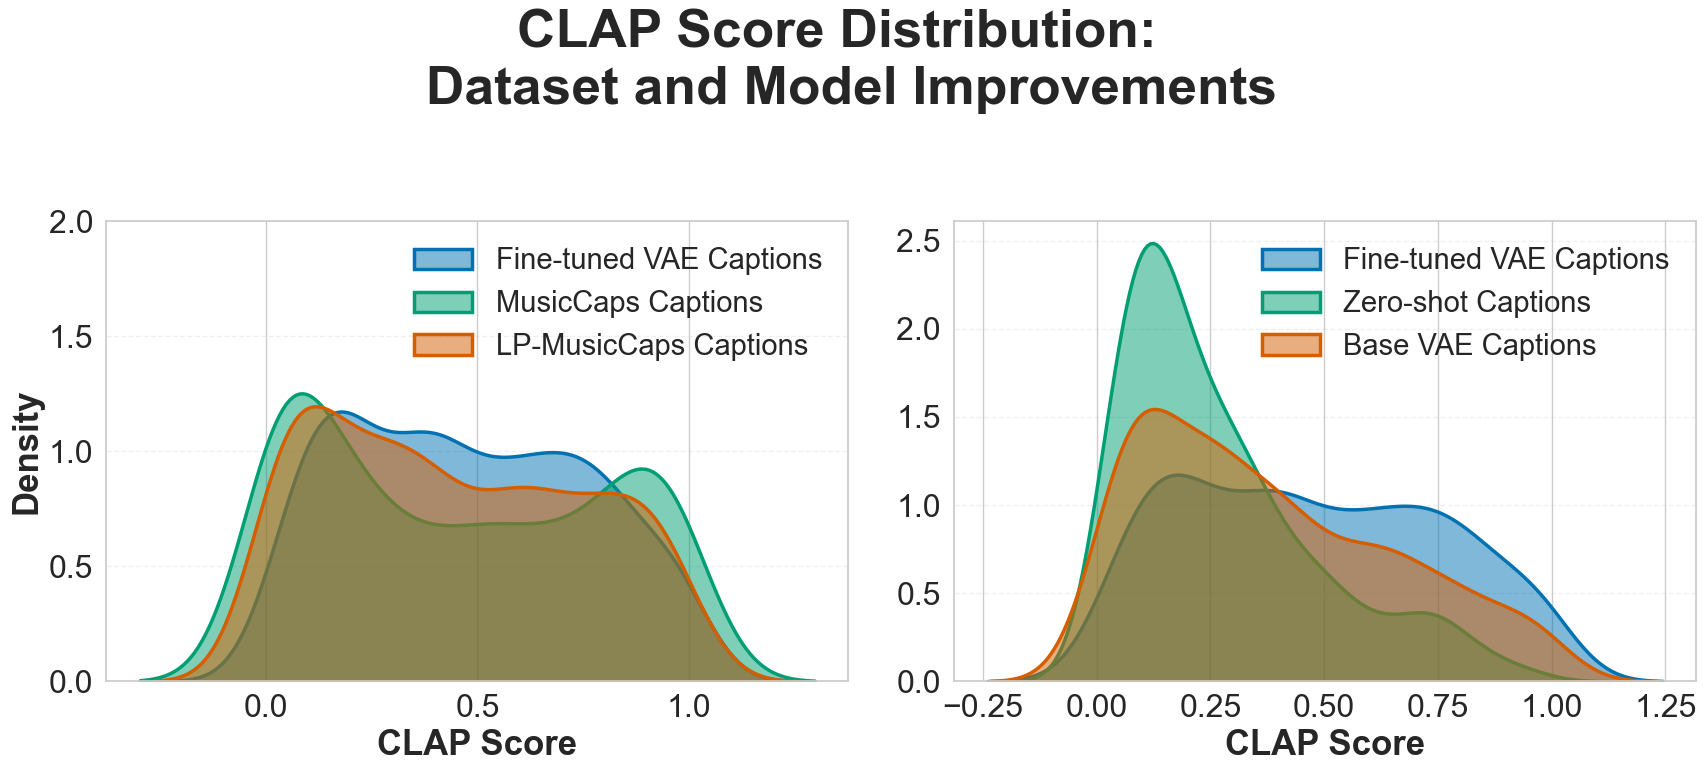

In [39]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2)

# Left subplot: Dataset comparison
datasets_left = ['subset', 'musiccaps', 'lp-musiccaps']
labels_left = ['Fine-tuned VAE Captions', 'MusicCaps Captions', 'LP-MusicCaps Captions']

for m, label in zip(datasets_left, labels_left):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax1, linewidth=2.5, palette='petroff10')

ax1.set_xlabel('CLAP Score', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
ax1.set_ylim(0.0, 2)
ax1.legend(loc='upper right', framealpha=0.0)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Right subplot: Model comparison
datasets_right = ['subset', 'zero-shot', 'base_vae']
labels_right = ['Fine-tuned VAE Captions', 'Zero-shot Captions', 'Base VAE Captions']

for m, label in zip(datasets_right, labels_right):
    sns.kdeplot(predictions[m]['clap_score'], label=label, fill=True, alpha=0.5, 
                ax=ax2, linewidth=2.5, palette='petroff10')

ax2.set_xlabel('CLAP Score', fontweight='bold')
ax2.set_ylabel('')
ax2.legend(loc='upper right', framealpha=0.0)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Overall title
fig.suptitle('CLAP Score Distribution: \n Dataset and Model Improvements', 
             fontweight='bold', y=1.00)

plt.tight_layout()
plt.savefig("../docs/assets/clap_score_distribution_comparison.pdf", bbox_inches='tight')
plt.show()